<a href="https://colab.research.google.com/github/jahnavinssdasari/Machine-Learning-Projects/blob/main/Ex2NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
import sklearn.metrics as skmet
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Retail_Business/weatherAUS.csv')

**Data exploration**

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Check for missing values

In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


Treatment for missing values

Handling Missing Values in Continuous Columns

In [ ]:
continuous_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                      'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                      'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                      'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
for column in continuous_columns:
    df[column].fillna(df[column].mean(), inplace=True)

print(df.isnull().sum())


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


<ipython-input-228-6c193088885f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Handling Missing Values in Categorical Columns

In [ ]:
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

print(df.isnull().sum())

<ipython-input-229-3e9049fa5bfe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


Mapping Categorical Values to Numeric

In [ ]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2,0


**Data Visualization**

Rainfall by Location


*   Cairns and Darwin show significantly higher average rainfall compared to others.




<ipython-input-232-fd02a73544c6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Rainfall', data=rainfall_summary, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When group

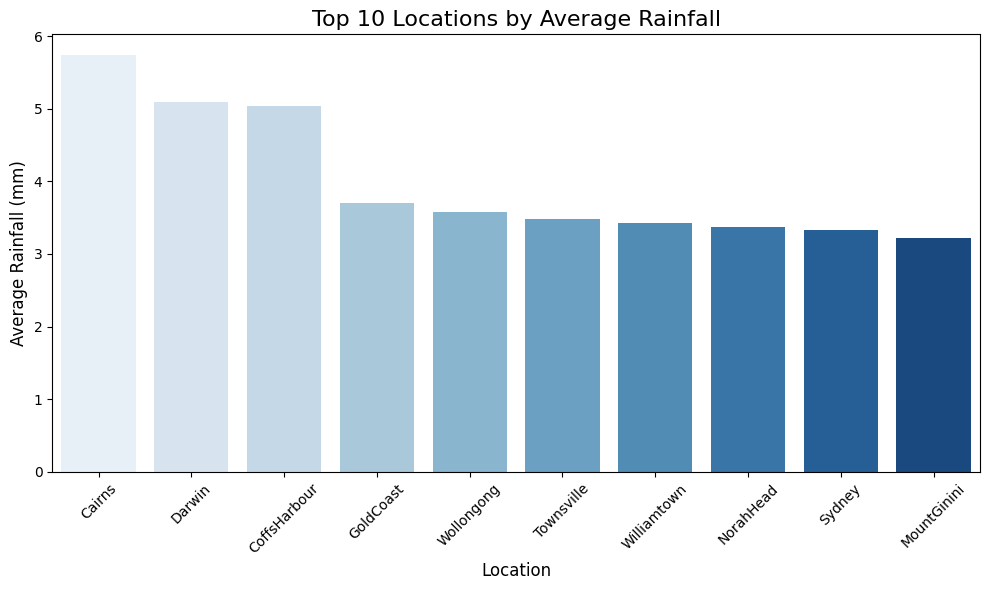

In [ ]:
rainfall_summary = df.groupby('Location')['Rainfall'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Rainfall', data=rainfall_summary, palette='Blues')
plt.title('Top 10 Locations by Average Rainfall', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Histograms for Continuous Variables


*   MinTemp: Shows colder temperatures are less frequent, with most temperatures clustering around 10-15°C.

*   MaxTemp: peak temparatures around 25-30°C.
*   Rainfall: most days do not experience significant rain.


*   Sunshine: Shows a good amount of sunny days in the dataset.



<Figure size 1400x800 with 0 Axes>

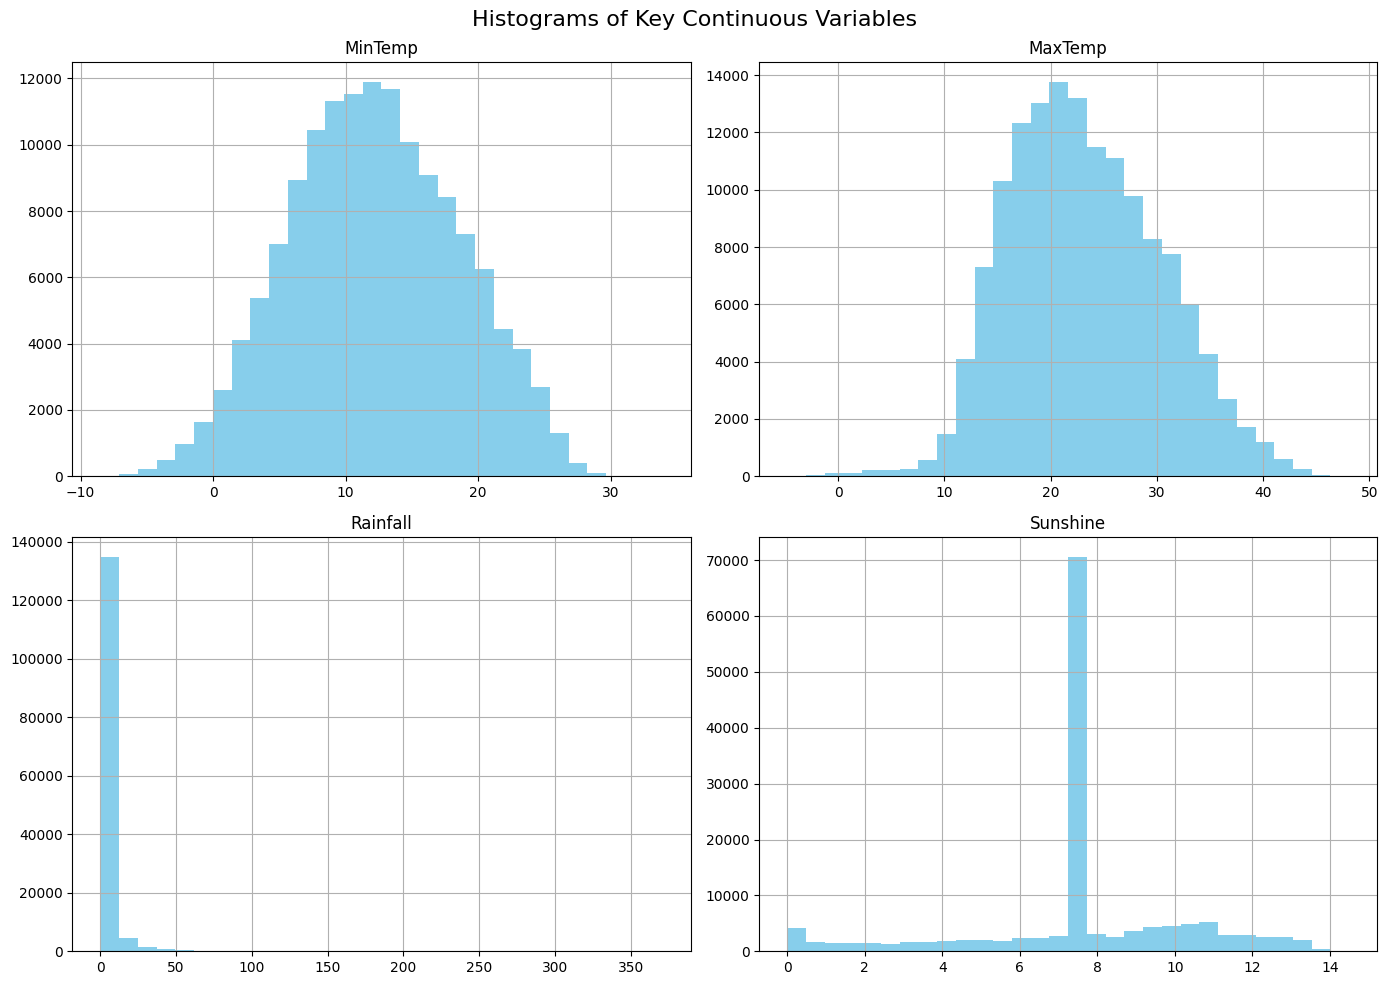

In [ ]:
plt.figure(figsize=(14, 8))

df[['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine']].hist(bins=30, figsize=(14, 10), layout=(2, 2), color='skyblue')

plt.suptitle('Histograms of Key Continuous Variables', fontsize=16)
plt.tight_layout()
plt.show()


Distributions of Wind, Cloud, Humidity, Pressure and Temperature at 3pm

<ipython-input-234-4aeca173d195>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WindDir3pm', data=df, palette='Set2', order=df['WindDir3pm'].value_counts().index, ax=axes[0, 0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_bas

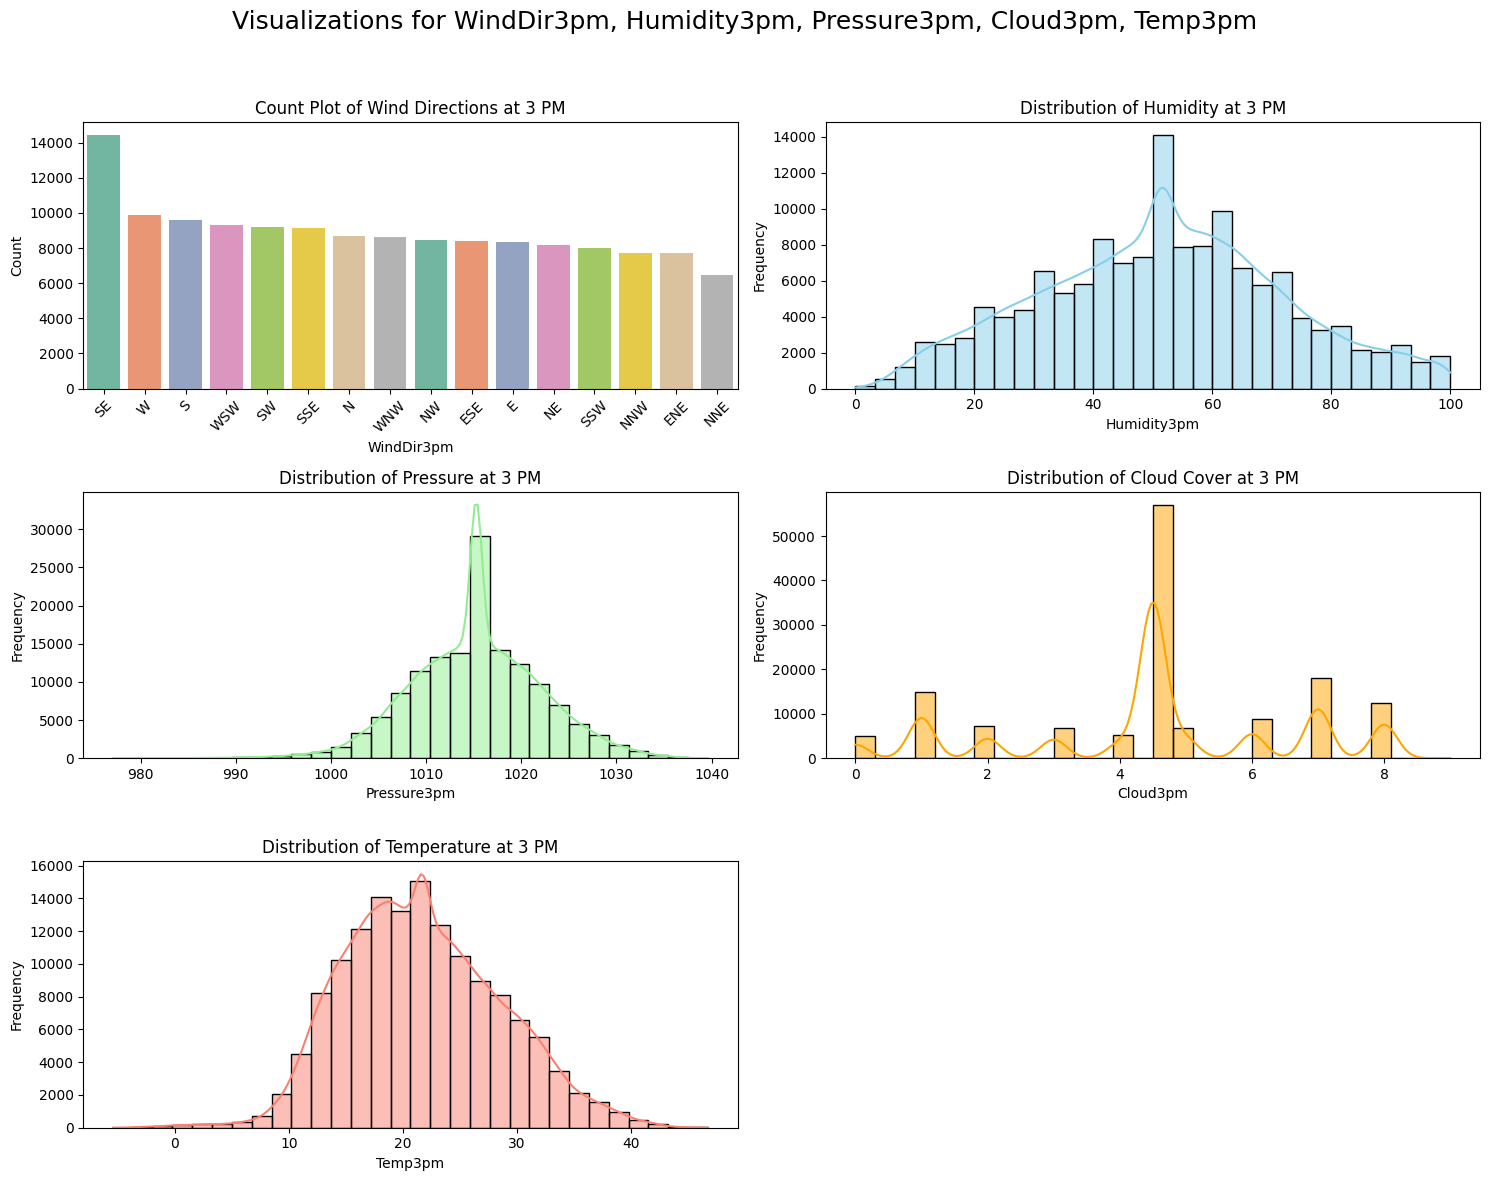

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Visualizations for WindDir3pm, Humidity3pm, Pressure3pm, Cloud3pm, Temp3pm', fontsize=18)

# 1. Count Plot for WindDir3pm
sns.countplot(x='WindDir3pm', data=df, palette='Set2', order=df['WindDir3pm'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('Count Plot of Wind Directions at 3 PM')
axes[0, 0].set_xlabel('WindDir3pm')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Histogram for Humidity3pm
sns.histplot(df['Humidity3pm'], bins=30, kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Humidity at 3 PM')
axes[0, 1].set_xlabel('Humidity3pm')
axes[0, 1].set_ylabel('Frequency')

# 3. Histogram for Pressure3pm
sns.histplot(df['Pressure3pm'], bins=30, kde=True, color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Pressure at 3 PM')
axes[1, 0].set_xlabel('Pressure3pm')
axes[1, 0].set_ylabel('Frequency')

# 4. Histogram for Cloud3pm
sns.histplot(df['Cloud3pm'], bins=30, kde=True, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Cloud Cover at 3 PM')
axes[1, 1].set_xlabel('Cloud3pm')
axes[1, 1].set_ylabel('Frequency')

# 5. Histogram for Temp3pm
sns.histplot(df['Temp3pm'], bins=30, kde=True, color='salmon', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Temperature at 3 PM')
axes[2, 0].set_xlabel('Temp3pm')
axes[2, 0].set_ylabel('Frequency')

axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Boxplots for Humidity

*  Humidity at 9 AM is generally higher than at 3 PM, with outliers suggesting variability in morning conditions, while afternoon humidity tends to be more consistent.



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


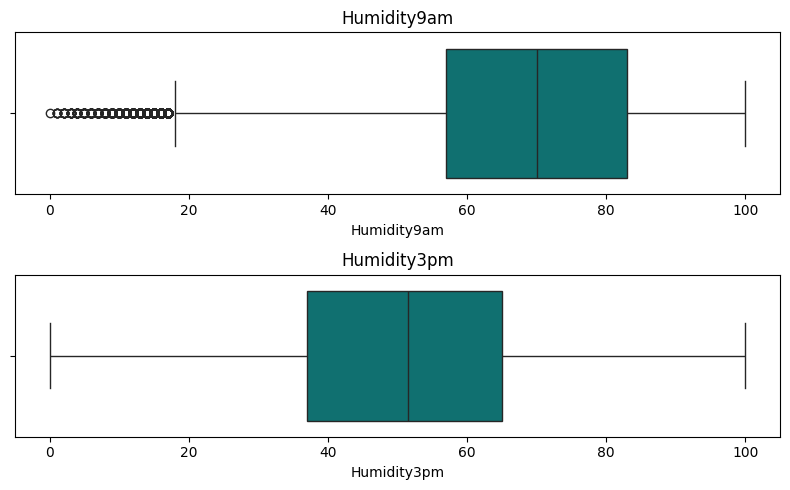

In [ ]:
plt.figure(figsize=(8, 5))

plt.subplot(2, 1, 1)
sns.boxplot(x=df['Humidity9am'], color='teal')
plt.title('Humidity9am')

plt.subplot(2, 1, 2)
sns.boxplot(x=df['Humidity3pm'], color='teal')
plt.title('Humidity3pm')

plt.tight_layout()
plt.show()

Outlier Removal

In [ ]:
print('Shape of df Before Removing Outliers:', df.shape)

# Remove outliers using Z-scores
df = df[(np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]

print('Shape of df After Removing Outliers:', df.shape)

Shape of df Before Removing Outliers: (131761, 22)
Shape of df After Removing Outliers: (120727, 22)


Imbalance check and Class distribution of Rain Tomorrow

Counts of Rain Tomorrow:
RainTomorrow
0    105448
1     26313
Name: count, dtype: int64

Percentages of Rain Tomorrow:
RainTomorrow
0    80.029751
1    19.970249
Name: count, dtype: float64


<ipython-input-237-f5d901471ddc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data=df, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


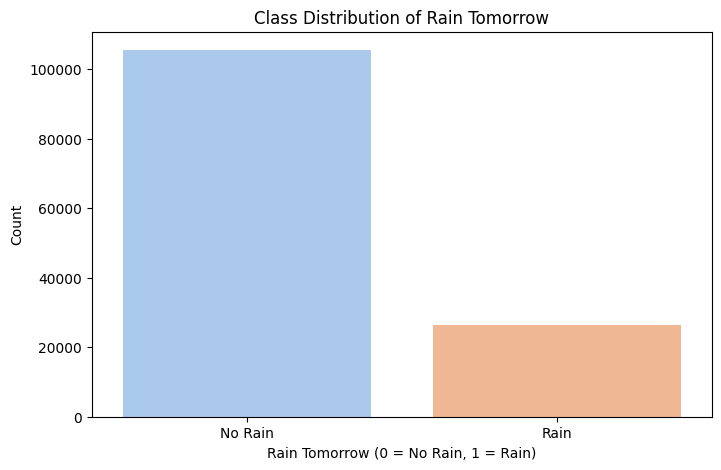

In [ ]:
rain_tomorrow_counts = df['RainTomorrow'].value_counts()
rain_tomorrow_percentages = rain_tomorrow_counts / len(df) * 100

print("Counts of Rain Tomorrow:")
print(rain_tomorrow_counts)
print("\nPercentages of Rain Tomorrow:")
print(rain_tomorrow_percentages)

plt.figure(figsize=(8, 5))
sns.countplot(x='RainTomorrow', data=df, palette='pastel')
plt.title('Class Distribution of Rain Tomorrow')
plt.xlabel('Rain Tomorrow (0 = No Rain, 1 = Rain)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Rain', 'Rain'])
plt.show()


 Dropping highly correlated columns


In [ ]:
df=df.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow'],
      dtype='object')

Train-Test Data Split

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0, stratify=df['RainTomorrow'])

Creating Weather Descriptions

Count Vectorization

In [ ]:
df['weather_description'] = (
    "It rained " + df['Rainfall'].astype(str) +
    "mm with a max temperature of " + df['MaxTemp'].astype(str) +
    "°C and humidity of " + df['Humidity3pm'].astype(str) + "%"
)

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['RainTomorrow'], random_state=0)

countvectorizer = CountVectorizer(analyzer='word', stop_words='english')

# Sampling and vectorizing
s_sample = train_df.sample(3, random_state=35)
s_vec = pd.DataFrame(countvectorizer.fit_transform(s_sample['weather_description']).toarray(),
                     columns=countvectorizer.get_feature_names_out())

s_vec


,0mm,13,14,23,33,60,70,humidity,max,rained,temperature
0,1,0,1,0,0,0,1,1,1,1,1
1,1,0,0,1,0,1,0,1,1,1,1
2,1,1,0,0,1,0,0,1,1,1,1


In [ ]:
# Transform the training data's weather description
X_train = countvectorizer.fit_transform(train_df['weather_description'])
y_train = train_df['RainTomorrow']

In [ ]:
# Transform the test data's weather description
X_test = countvectorizer.transform(test_df['weather_description'])
y_test = test_df['RainTomorrow']


SMOTE for Class Imbalance

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Multinomial Naive Bayes Model

In [ ]:
# Multinomial Naive Bayes
classifier_mb = MultinomialNB()
classifier_mb.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

Model Evaluation on Test Data

In [ ]:
y_pred_test = classifier_mb.predict(X_test)

Testing Data Accuracy

In [ ]:
# Accuracy
accuracy_test = skmet.accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {accuracy_test:.4f}')

Test Accuracy: 0.7396


Training Data Accuracy

In [ ]:
# Training Data accuracy
y_pred_train = classifier_mb.predict(X_train_resampled)

In [ ]:
# Accuracy for Training Data
accuracy_train = skmet.accuracy_score(y_train_resampled, y_pred_train)
print(f'Training Accuracy: {accuracy_train:.4f}')

Training Accuracy: 0.7206


Model Tuning - Hyperparameter optimization (Laplace Smoothing)

In [ ]:
mnb_lap = MultinomialNB(alpha=5)

# Fit the model on training data
mnb_lap.fit(X_train, y_train)

MultinomialNB(alpha=5)

In [ ]:
# Evaluation on Test Data after applying Laplace smoothing
test_pred_lap = mnb_lap.predict(X_test)

In [ ]:
# Crosstab for predictions vs actual (for test set)
pd.crosstab(test_pred_lap, y_test)

RainTomorrow,0,1
row_0,,
0,19848,3345
1,1242,1918


Testing Accuracy after Laplace Smoothing

In [ ]:
# Test accuracy using np.mean
accuracy_test_lap = np.mean(test_pred_lap == y_test)
print(f"Test Accuracy (Laplace smoothing): {accuracy_test_lap:.4f}")

Test Accuracy (Laplace smoothing): 0.8259


In [ ]:
# Training Data predictions
train_pred_lap = mnb_lap.predict(X_train)

In [ ]:
# Crosstab for training predictions vs actual (for training set)
pd.crosstab(train_pred_lap, y_train)

RainTomorrow,0,1
row_0,,
0,79517,13285
1,4841,7765


Training Accuracy after Laplace Smoothing

In [ ]:
# Training accuracy using np.mean
accuracy_train_lap = np.mean(train_pred_lap == y_train)
print(f"Training Accuracy (Laplace smoothing): {accuracy_train_lap:.4f}")

Training Accuracy (Laplace smoothing): 0.8280


Additional Metrics

In [ ]:
# Metrics: accuracy, sensitivity, specificity, precision
accuracy_test = skmet.accuracy_score(y_test.ravel(), test_pred_lap)
sensitivity_test = skmet.recall_score(y_test.ravel(), test_pred_lap)
specificity_test = skmet.recall_score(y_test.ravel(), test_pred_lap, pos_label=0)
precision_test = skmet.precision_score(y_test.ravel(), test_pred_lap)

print("accuracy: %.2f, sensitivity: %.2f, specificity: %.2f, precision: %.2f" %
      (accuracy_test, sensitivity_test, specificity_test, precision_test))

accuracy: 0.83, sensitivity: 0.36, specificity: 0.94, precision: 0.61


<ipython-input-256-fc6e66570468>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  accuracy_test = skmet.accuracy_score(y_test.ravel(), test_pred_lap)
<ipython-input-256-fc6e66570468>:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  sensitivity_test = skmet.recall_score(y_test.ravel(), test_pred_lap)  # Sensitivity (Recall for class=1)
<ipython-input-256-fc6e66570468>:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  specificity_test = skmet.recall_score(y_test.ravel(), test_pred_lap, pos_label=0)  # Specificity (Recall for class=0)
<ipython-input-256-fc6e66570468>:5: FutureWarning: Series.ravel is deprecated. The underlying array 

Confusion Matrix for Rain Tomorrow Detection

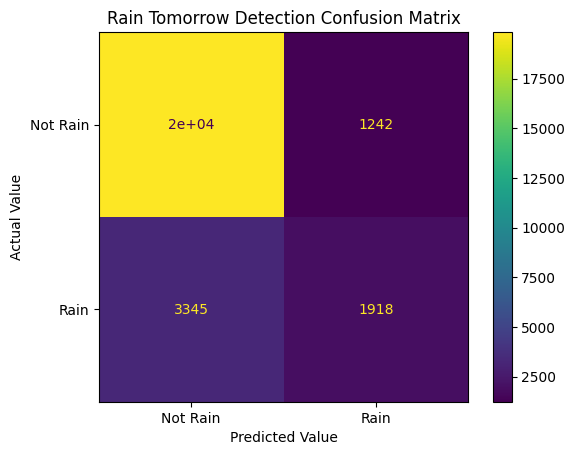

In [ ]:
cm = skmet.confusion_matrix(y_test, test_pred_lap)
cm_plot = skmet.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rain', 'Rain'])
cm_plot.plot()

cm_plot.ax_.set(title='Rain Tomorrow Detection Confusion Matrix',
                xlabel='Predicted Value', ylabel='Actual Value')

plt.show()

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow,weather_description
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,24.0,22.0,1007.7,1007.1,8.000000,4.503167,0,0.0,0,It rained 0.6mm with a max temperature of 22.9...
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,22.0,25.0,1010.6,1007.8,4.437189,4.503167,0,0.0,0,It rained 0.0mm with a max temperature of 25.1...
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,26.0,30.0,1007.6,1008.7,4.437189,2.000000,0,0.0,0,It rained 0.0mm with a max temperature of 25.7...
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,9.0,16.0,1017.6,1012.8,4.437189,4.503167,0,1.0,0,It rained 0.0mm with a max temperature of 28.0...
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,20.0,33.0,1010.8,1006.0,7.000000,8.000000,0,0.2,0,It rained 1.0mm with a max temperature of 32.3...
